In [208]:
import os
import json
from prettytable import PrettyTable
from prettytable import MSWORD_FRIENDLY,MARKDOWN

In [209]:
import numpy as np
import matplotlib.pyplot as plt

In [210]:
class DataSet:
    def __init__(self):
        self.data = []
    def makePrettyTable(self,columns, labels):
        table = PrettyTable()
        for i in range(len(columns)):
            table.add_column(labels[i], columns[i])
        return table
    
    def build_chart(self, x_name, y_name, x_label="", y_label="",isScatter = False):
        sortedData = sorted(self.data, key=lambda x: x[x_name]) 
        x = [el[x_name] for el in sortedData]
        y = [el[y_name] for el in sortedData]
        
        fig, ax = plt.subplots(figsize = (12, 6))
        if isScatter:
            ax.scatter(x, y, color='r')
        else:
            ax.plot(x, y, color='r')
        if x_label == "":
            ax.set_xlabel(x_name)
        else:
            ax.set_xlabel(x_label)    
        if y_label == "":
            ax.set_ylabel(y_name)
        else:
            ax.set_ylabel(y_label)
        ax.legend()
           

In [211]:
class ThicknessesAnalysis(DataSet):
    def addData(self, fileName):
        with open(fileName, "r") as read_file:
            self.data = self.data + json.load(read_file)
            self.x = [[float(el['th1']),float(el['th2']), float(el['th3'])] for el in self.data]
    def print_table(self):
        columns = []
        columns.append([el['th1'] for el in self.data])
        columns.append([el['th2'] for el in self.data])
        columns.append([el['th3'] for el in self.data])
        columns.append([round(el['min_MTF'],2) for el in self.data])
        columns.append([round(el['max_RMS'],2) for el in self.data])
        columns.append([round(el['foc_surf'],2) for el in self.data])
        labels = ['1 зазор, мм','2 зазор, мм','3 зазор, мм', 'Худший ФПМ', 'Худший RMS радиус', 'Фокус' ]
        Table1 = self.makePrettyTable(columns, labels)
        Table1.set_style(MARKDOWN)
        print(Table1)

In [212]:
class DecenteredAnalysis(DataSet):
    def addData(self, fileName):
        with open(fileName, "r") as read_file:
            self.data = self.data + json.load(read_file)
            self.x = [[
                float(el['dcx1']),float(el['dcy1']),
                float(el['dcx2']),float(el['dcy2']),
                float(el['dcx3']),float(el['dcy3'])
            ] for el in self.data]
    def print_table(self):
        columns = []
        columns.append([el['dcx1'] for el in self.data])
        columns.append([el['dcy1'] for el in self.data])
        columns.append([el['dcx2'] for el in self.data])
        columns.append([el['dcy2'] for el in self.data])
        columns.append([el['dcx3'] for el in self.data])
        columns.append([el['dcy3'] for el in self.data])
        columns.append([el['dcx4'] for el in self.data])
        columns.append([el['dcy4'] for el in self.data])
        columns.append([round(el['min_MTF'],2) for el in self.data])
        columns.append([round(el['max_RMS'],2) for el in self.data])
        columns.append([round(el['foc_surf'],2) for el in self.data])
        labels = [
            'децентровка 1X, мм','децентровка 1Y, мм',
            'децентровка 2X, мм','децентровка 2Y,мм',
            'децентровка 3X, мм','децентровка 3Y,мм',
            'децентровка 4X, мм','децентровка 4Y,мм',
            'Худший ФПМ', 'Худший RMS радиус', 'Фокус' ]
        Table1 = self.makePrettyTable(columns, labels)
        Table1.set_style(MARKDOWN)
        print(Table1)

In [213]:
thicks_dif_files = os.listdir('data_diff')
thicks_dif_files.pop(1)
thicks_dif_files_1 = ['thick1_1.json','thick1_2.json','thick1_3.json' ]
thicknesses_diff_1 = ThicknessesAnalysis()
for name in thicks_dif_files_1:
    thicknesses_diff_1.addData('data_diff/'+name)

No handles with labels found to put in legend.


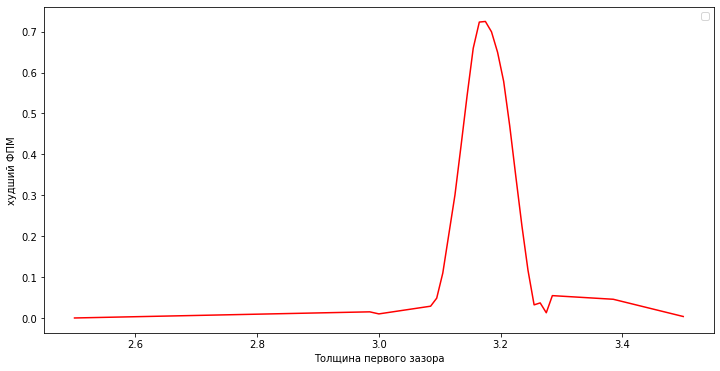

In [215]:
thicknesses_diff_1.build_chart('th1', 'min_MTF', 'Толщина первого зазора', 'худший ФПМ')

No handles with labels found to put in legend.


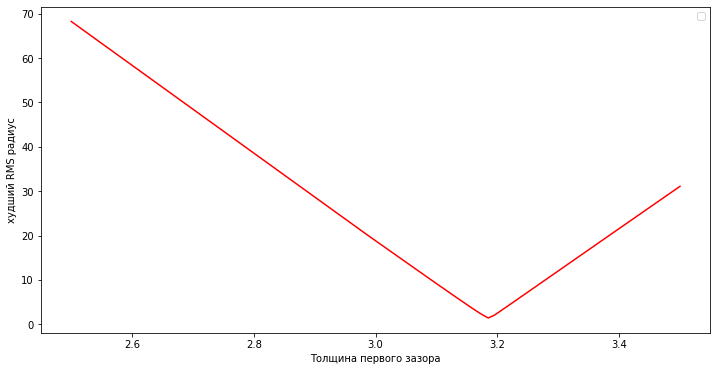

In [159]:
thicknesses_diff_1.build_chart('th1', 'max_RMS', 'Толщина первого зазора', 'худший RMS радиус')

In [217]:

thicks_dif_files_2 = ['thick2_1.json','thick2_2.json']
thicknesses_diff_2 = ThicknessesAnalysis()
for name in thicks_dif_files_2:
    thicknesses_diff_2.addData('data_diff/'+name)

In [219]:
thicknesses_diff_2.print_table()

| 1 зазор, мм | 2 зазор, мм | 3 зазор, мм | Худший ФПМ | Худший RMS радиус | Фокус |
|-------------|-------------|-------------|------------|-------------------|-------|
|    3.185    |      5      |      4      |    0.7     |        1.4        |  4.51 |
|    3.185    |      6      |      4      |    0.7     |        1.4        |  4.51 |
|    3.185    |      7      |      4      |    0.7     |        1.4        |  4.51 |
|    3.185    |      5      |      4      |    0.7     |        1.4        |  4.51 |
|    3.185    |     0.1     |      4      |    0.7     |        1.4        |  4.51 |
|    3.185    |      1      |      4      |    0.7     |        1.4        |  4.51 |
|    3.185    |      2      |      4      |    0.7     |        1.4        |  4.51 |
|    3.185    |      3      |      4      |    0.7     |        1.4        |  4.51 |
|    3.185    |      4      |      4      |    0.7     |        1.4        |  4.51 |
|    3.185    |      6      |      4      |    0.7     |        1

No handles with labels found to put in legend.


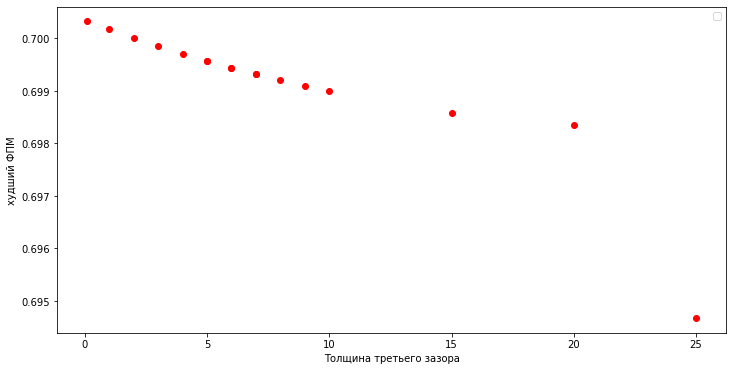

In [223]:
thicknesses_diff_2.build_chart('th2', 'min_MTF', 'Толщина третьего зазора', 'худший ФПМ', True)

No handles with labels found to put in legend.


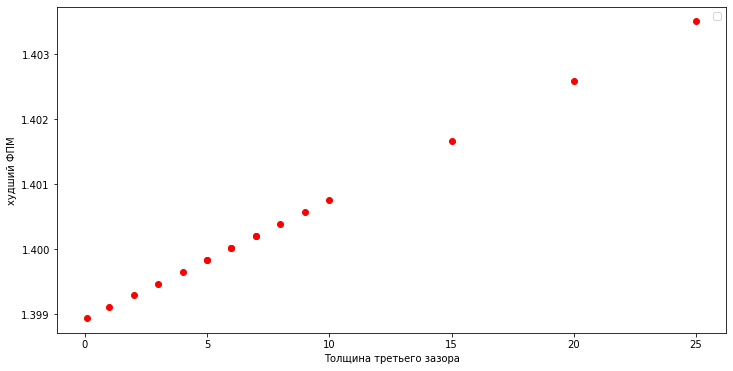

In [222]:
thicknesses_diff_2.build_chart('th2', 'max_RMS', 'Толщина третьего зазора', 'худший ФПМ', True)

In [146]:

thicks_dif_files_3 = ['thick3_1.json','thick3_2.json']
thicknesses_diff_3 = ThicknessesAnalysis()
for name in thicks_dif_files_3:
    thicknesses_diff_3.addData('data_diff/'+name)

In [147]:
thicknesses_diff_3.print_table()

| 1 зазор, мм | 2 зазор, мм | 3 зазор, мм | Худший ФПМ | Худший RMS радиус | Фокус |
|-------------|-------------|-------------|------------|-------------------|-------|
|    3.185    |      5      |      4      |    0.7     |        1.4        |  4.51 |
|    3.185    |      5      |      1      |    0.7     |        1.82       |  4.51 |
|    3.185    |      5      |      2      |    0.7     |        1.66       |  4.51 |
|    3.185    |      5      |      3      |    0.7     |        1.52       |  4.51 |
|    3.185    |      5      |      5      |    0.7     |        1.29       |  4.51 |
|    3.185    |      5      |      6      |    0.7     |        1.21       |  4.51 |
|    3.185    |      5      |      4      |    0.7     |        1.4        |  4.51 |
|    3.185    |      5      |      10     |    0.7     |        1.27       |  4.51 |
|    3.185    |      5      |      12     |    0.7     |        1.3        |  4.51 |
|    3.185    |      5      |      13     |    0.7     |        1

No handles with labels found to put in legend.


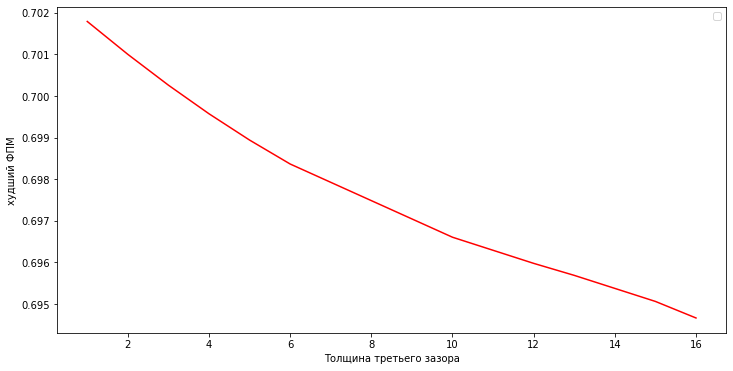

In [148]:
thicknesses_diff_3.build_chart('th3', 'min_MTF', 'Толщина третьего зазора', 'худший ФПМ')

No handles with labels found to put in legend.


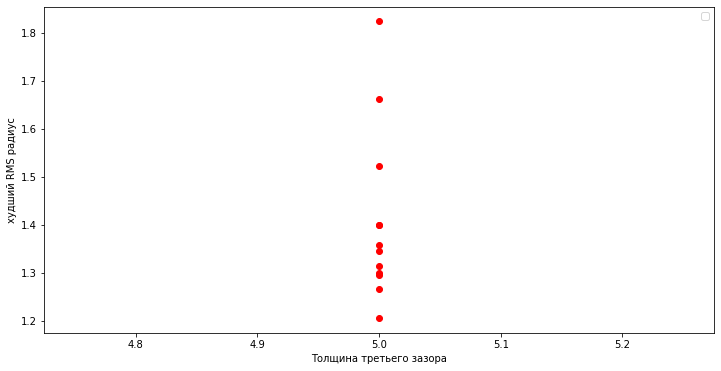

In [216]:
thicknesses_diff_3.build_chart('th3', 'max_RMS', 'Толщина третьего зазора', 'худший RMS радиус', True)

No handles with labels found to put in legend.


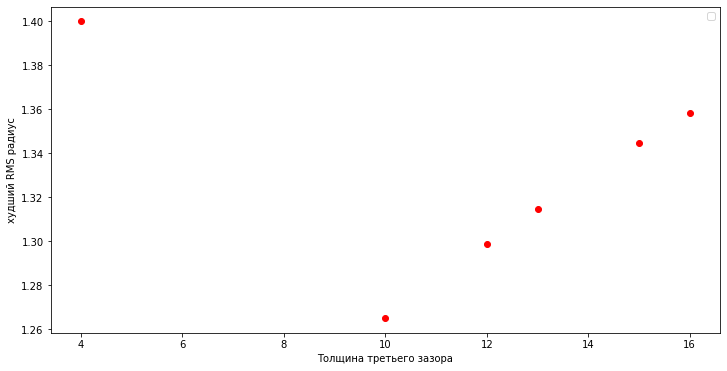

In [144]:
thicknesses_diff_3_2.build_chart('th3', 'max_RMS', 'Толщина третьего зазора', 'худший RMS радиус', True)

In [164]:
os.listdir('data_diff/decenters')

['decentred_3x_2.json',
 'decentred_1y_1.json',
 'decentred_2x_2.json',
 '.DS_Store',
 'decentred_1_1.json',
 'decentred_2y_1.json',
 'decentred_4x_1.json',
 'decentred_3y_1.json',
 'decentred_4x_2.json',
 'decentred_3y_2.json',
 'decentred_2y_2.json',
 'decentred_1_2.json',
 'decentred_2x_1.json',
 'decentred_3x_1.json',
 'decentred_1y_2.json']

In [171]:
dec_diff_files = os.listdir('data_diff/decenters')
dec_diff_files.pop(4)
dec_diff_files_1 = ['decentred_1_1.json','decentred_1_2.json']
dec_diff_1 = DecenteredAnalysis()
for name in dec_diff_files_1:
    dec_diff_1.addData('data_diff/decenters/'+name)

In [179]:
dec_diff_files_1y = ['decentred_1y_1.json','decentred_1y_2.json']
dec_diff_1y = DecenteredAnalysis()
for name in dec_diff_files_1y:
    dec_diff_1y.addData('data_diff/decenters/'+name)

In [180]:
dec_diff_files_2x = ['decentred_2x_1.json','decentred_2x_2.json']
dec_diff_2x = DecenteredAnalysis()
for name in dec_diff_files_2x:
    dec_diff_2x.addData('data_diff/decenters/'+name)

In [181]:
dec_diff_files_2y = ['decentred_2y_1.json','decentred_2y_2.json']
dec_diff_2y = DecenteredAnalysis()
for name in dec_diff_files_2y:
    dec_diff_2y.addData('data_diff/decenters/'+name)

In [182]:
dec_diff_files_3x = ['decentred_3x_1.json','decentred_3x_2.json']
dec_diff_3x = DecenteredAnalysis()
for name in dec_diff_files_3x:
    dec_diff_3x.addData('data_diff/decenters/'+name)

In [183]:
dec_diff_files_3y = ['decentred_3y_1.json','decentred_3y_2.json']
dec_diff_3y = DecenteredAnalysis()
for name in dec_diff_files_3y:
    dec_diff_3y.addData('data_diff/decenters/'+name)

In [184]:
dec_diff_files_4x = ['decentred_4x_1.json','decentred_4x_2.json']
dec_diff_4x = DecenteredAnalysis()
for name in dec_diff_files_4x:
    dec_diff_4x.addData('data_diff/decenters/'+name)

No handles with labels found to put in legend.


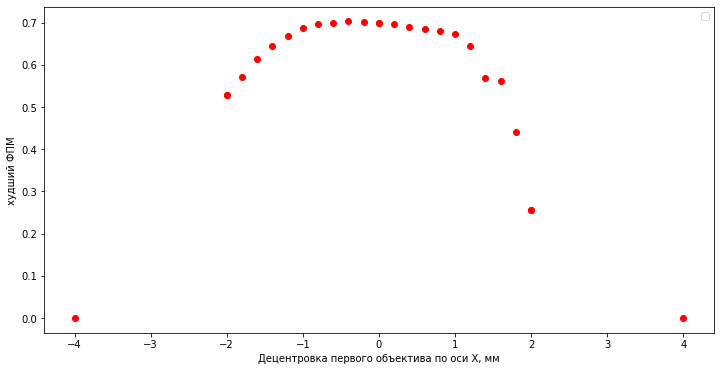

In [187]:
dec_diff_1.build_chart('dcx1', 'min_MTF', 'Децентровка первого объектива по оси Х, мм', 'худший ФПМ', True)

No handles with labels found to put in legend.


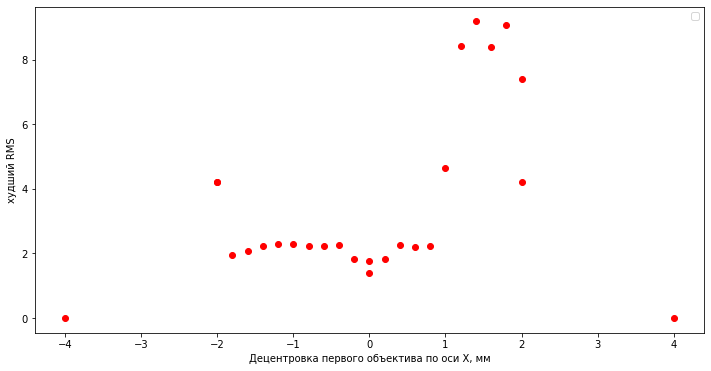

In [177]:
dec_diff_1.build_chart('dcx1', 'max_RMS', 'Децентровка первого объектива по оси Х, мм', 'худший RMS', True)

No handles with labels found to put in legend.


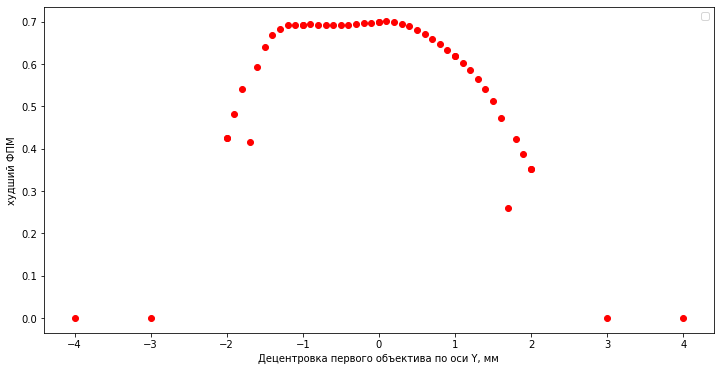

In [186]:
dec_diff_1y.build_chart('dcy1', 'min_MTF', 'Децентровка первого объектива по оси Y, мм', 'худший ФПМ', True)

No handles with labels found to put in legend.


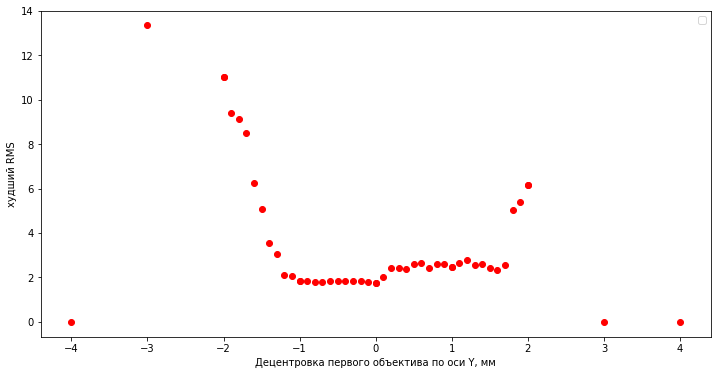

In [188]:
dec_diff_1y.build_chart('dcy1', 'max_RMS', 'Децентровка первого объектива по оси Y, мм', 'худший RMS', True)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


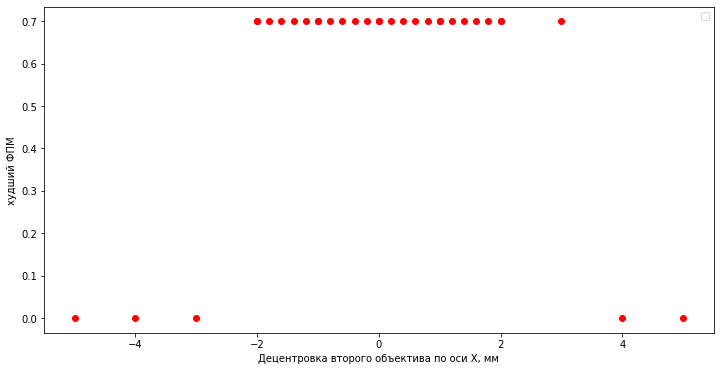

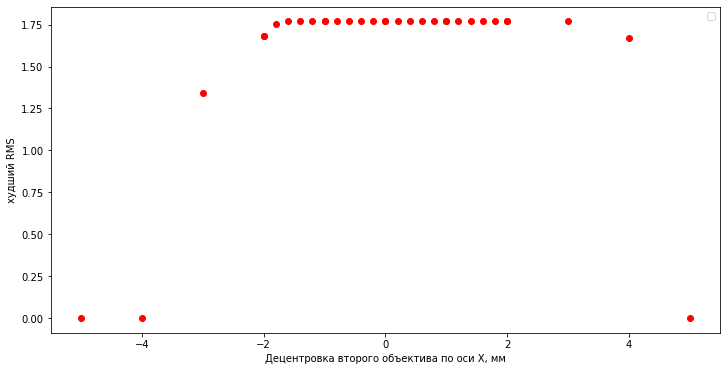

In [202]:
dec_diff_2x.build_chart('dcx2', 'min_MTF', 'Децентровка второго объектива по оси X, мм', 'худший ФПМ', True)
dec_diff_2x.build_chart('dcx2', 'max_RMS', 'Децентровка второго объектива по оси X, мм', 'худший RMS', True)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


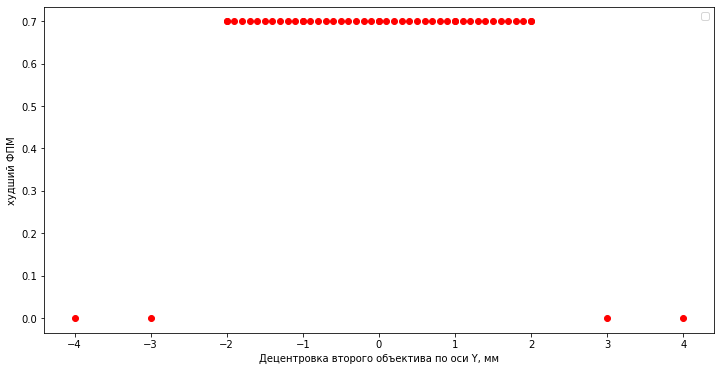

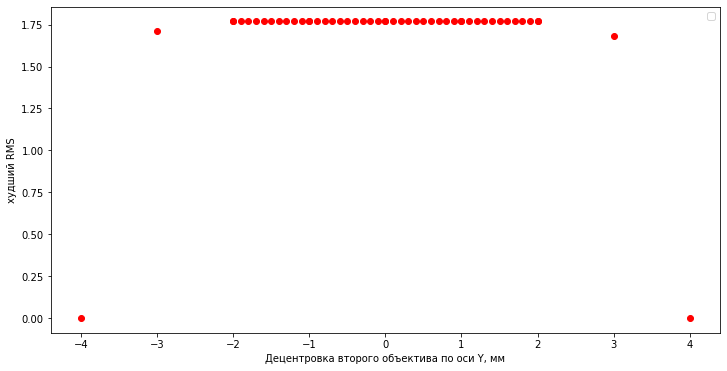

In [203]:
dec_diff_2y.build_chart('dcy2', 'min_MTF', 'Децентровка второго объектива по оси Y, мм', 'худший ФПМ', True)
dec_diff_2y.build_chart('dcy2', 'max_RMS', 'Децентровка второго объектива по оси Y, мм', 'худший RMS', True)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


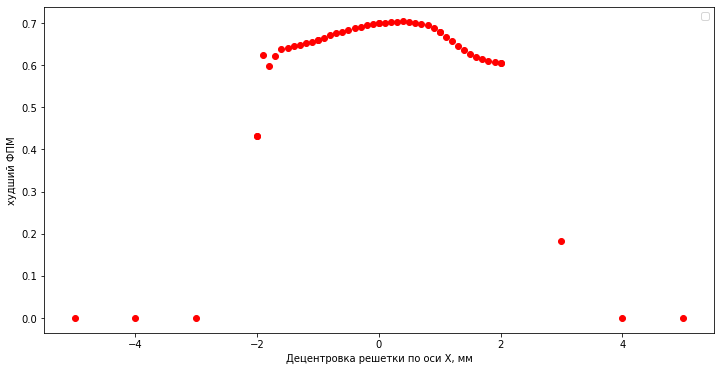

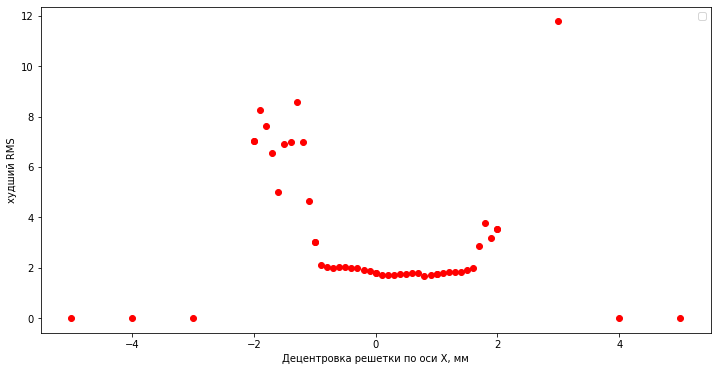

In [204]:
dec_diff_3x.build_chart('dcx3', 'min_MTF', 'Децентровка решетки по оси Х, мм', 'худший ФПМ', True)
dec_diff_3x.build_chart('dcx3', 'max_RMS', 'Децентровка решетки по оси Х, мм', 'худший RMS', True)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


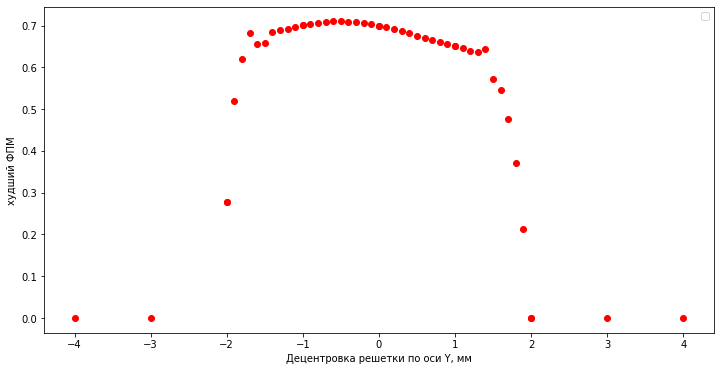

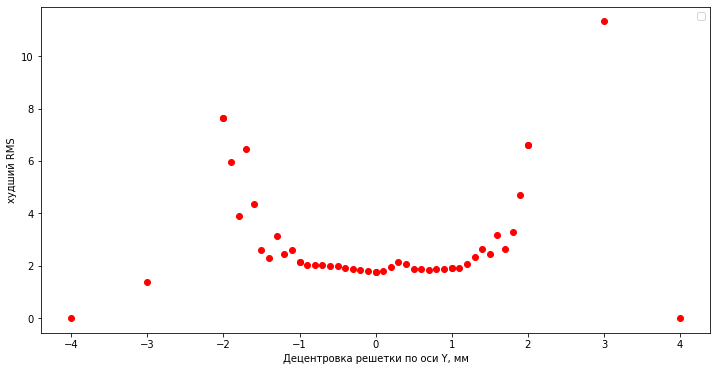

In [205]:
dec_diff_3y.build_chart('dcy3', 'min_MTF', 'Децентровка решетки по оси Y, мм', 'худший ФПМ', True)
dec_diff_3y.build_chart('dcy3', 'max_RMS', 'Децентровка решетки по оси Y, мм', 'худший RMS', True)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


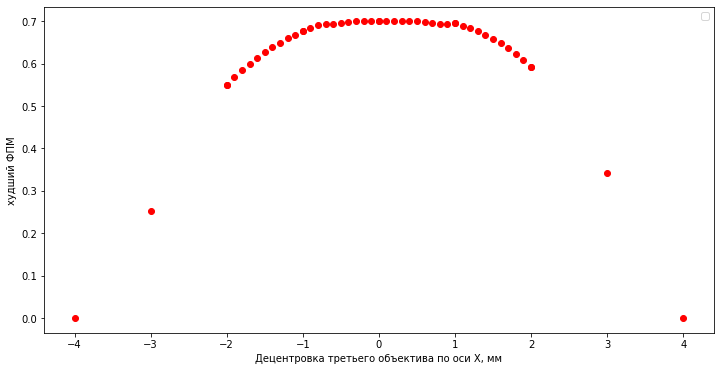

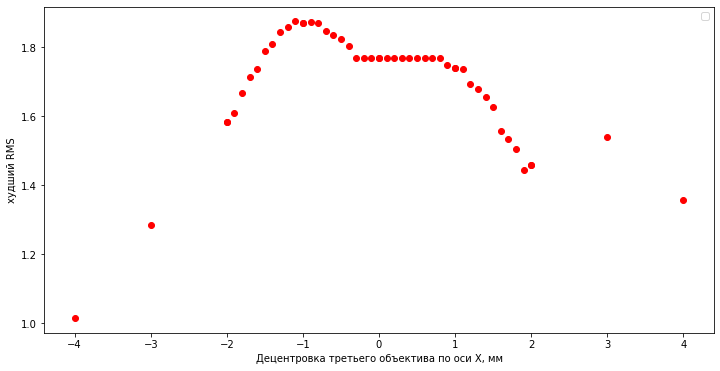

In [206]:
dec_diff_4x.build_chart('dcx4', 'min_MTF', 'Децентровка третьего объектива по оси Х, мм', 'худший ФПМ', True)
dec_diff_4x.build_chart('dcx4', 'max_RMS', 'Децентровка третьего объектива по оси Х, мм', 'худший RMS', True)